<a href="https://colab.research.google.com/github/abhay-ugale-25/traffic-streaming-simulation/blob/main/traffic_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Streaming Simulation

This notebook demonstrates a **small-scale streaming data simulation** using Python.  
We use **generator functions** to mimic real-time streaming data and process it in **batches**.  

The goal is to:
- Simulate traffic data arriving in small batches
- Process each batch (average traffic, max temperature, common weather)
- Update plots dynamically after each batch
- Summarize all batches in a clean DataFrame


In [17]:
from google.colab import files
uploaded = files.upload()


Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv


## Importing Required Libraries

We use:
- `pandas` for data manipulation  
- `matplotlib` for visualization  
- `time` to simulate real-time delay in streaming  


In [ ]:
# Import Libraries
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display, clear_output

In [18]:
# Load Dataset
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(df.shape)
print(df.head())

(48204, 9)
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


##  Simulating Data Stream (Generator Function)

We define a generator function `data_stream` that:
- Splits the dataset into **small chunks (batches)**
- Yields one batch at a time, simulating real-time streaming


In [ ]:
# Data Stream Generator Function
def traffic_stream(dataframe, batch_size):
  total_rows = len(dataframe)
  for start in range(0, total_rows, batch_size):
    end = start + batch_size
    yield dataframe[start:end]
    time.sleep(delay)

## Processing Each Batch

For each batch:
- Calculate **average traffic count**
- Find **maximum temperature**
- Identify **most common weather condition**
- Record the **time range covered**

These values are stored for final summarization.


## Dynamic Plot Updates

We update the plot after each batch:
- `avg_traffic` (line chart – blue)
- `max_temp` (line chart – red)
- Each batch adds a new point, showing **real-time evolution**

## Final Summary Table

At the end, we compile results into a summary DataFrame that shows:
- Batch number
- Average traffic
- Maximum temperature
- Most common weather
- Time range of the batch



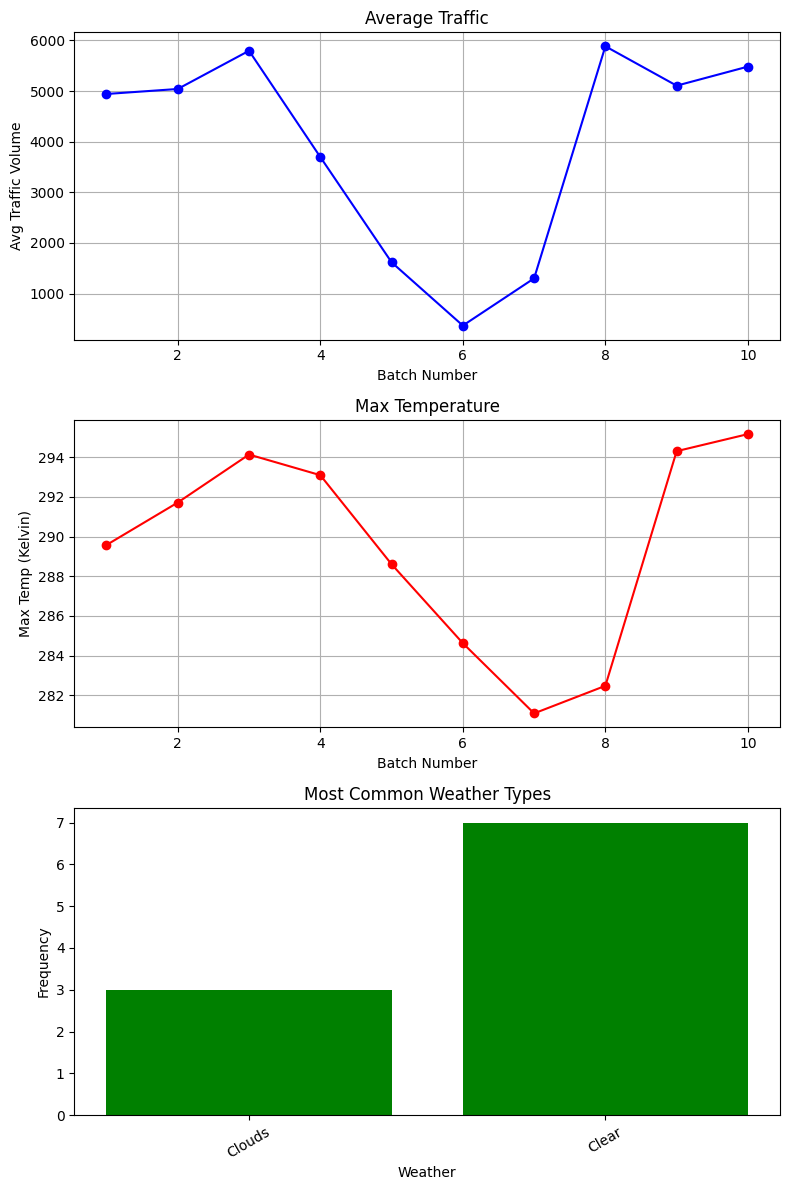

   batch_number  avg_traffic  max_temp common_weather  \
0             1      4942.67    289.58         Clouds   
1             2      5041.67    291.72         Clouds   
2             3      5796.67    294.14          Clear   
3             4      3697.67    293.10         Clouds   
4             5      1617.67    288.61          Clear   
5             6       366.67    284.63          Clear   
6             7      1299.67    281.09          Clear   
7             8      5885.00    282.48          Clear   
8             9      5107.00    294.31          Clear   
9            10      5484.00    295.17          Clear   

                                   time_range  
0  (2012-10-02 09:00:00, 2012-10-02 11:00:00)  
1  (2012-10-02 12:00:00, 2012-10-02 14:00:00)  
2  (2012-10-02 15:00:00, 2012-10-02 17:00:00)  
3  (2012-10-02 18:00:00, 2012-10-02 20:00:00)  
4  (2012-10-02 21:00:00, 2012-10-02 23:00:00)  
5  (2012-10-03 00:00:00, 2012-10-03 02:00:00)  
6  (2012-10-03 03:00:00, 2012-10-03 

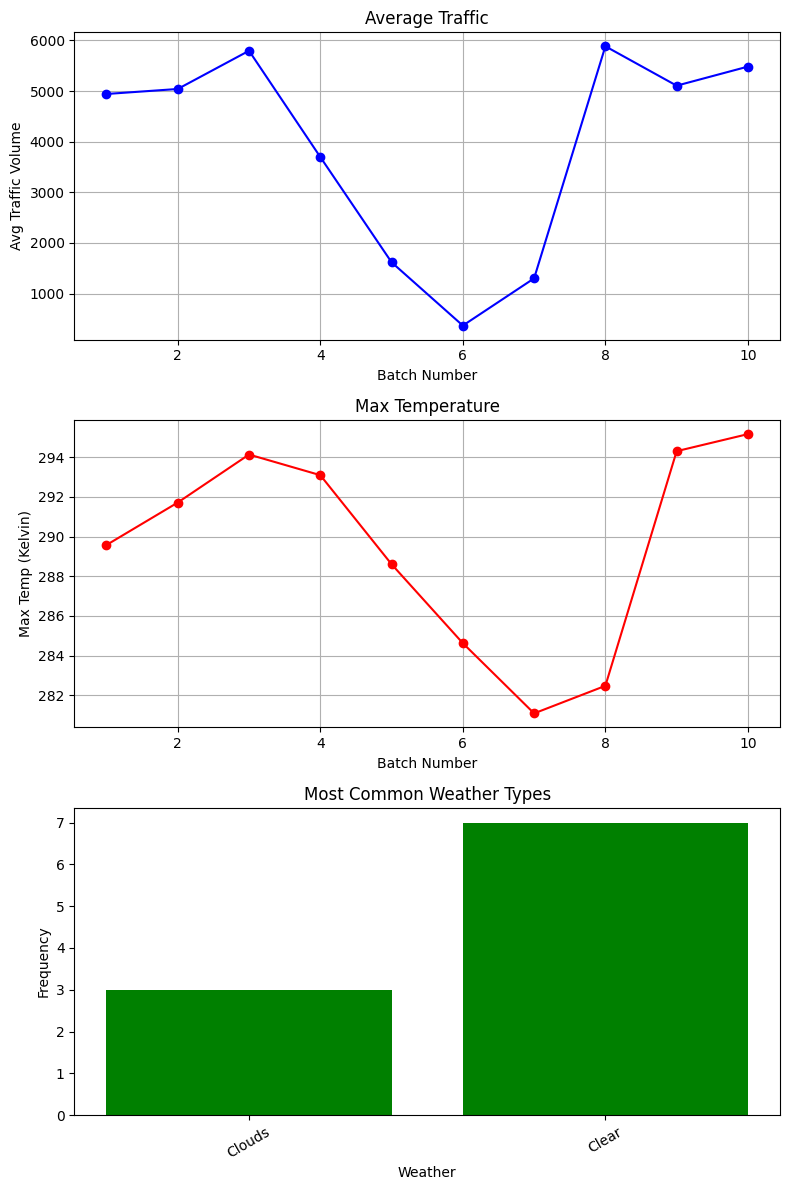

In [ ]:
batch_size = 3
delay = 3

results = []

batch_numbers = []
avg_traffic_list = []
max_temp_list = []
common_weather_list = []

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Batch Processing
for i, batch in enumerate(traffic_stream(df, batch_size), start=1):
  print(f"Batch {i}: Processed")
  avg_traffic = batch['traffic_volume'].mean().round(2)
  max_temp = batch['temp'].max()
  common_weather = batch['weather_main'].mode()[0]
  time_range = batch['date_time'].min(), batch['date_time'].max()

  batch_numbers.append(i)
  avg_traffic_list.append(avg_traffic)
  max_temp_list.append(max_temp)
  common_weather_list.append(common_weather)

  results.append({
      'batch_number': i,
      'avg_traffic': avg_traffic,
      'max_temp': max_temp,
      'common_weather': common_weather,
      'time_range': time_range
      })

  # plot 1: avg trffic
  ax1.cla()
  ax1.plot(batch_numbers, avg_traffic_list, marker='o', color ='blue')
  ax1.set_title("Average Traffic")
  ax1.set_xlabel("Batch Number")
  ax1.set_ylabel("Avg Traffic Volume")
  ax1.grid(True)

  # plot 2: max temp
  ax2.cla()
  ax2.plot(batch_numbers, max_temp_list, marker='o', color='red')
  ax2.set_title("Max Temperature")
  ax2.set_xlabel("Batch Number")
  ax2.set_ylabel("Max Temp (Kelvin)")
  ax2.grid(True)

  # splot 3: weather counts
  ax3.cla()
  counts = Counter(common_weather_list)
  ax3.bar(counts.keys(), counts.values(), color='green')
  ax3.set_title("Most Common Weather Types")
  ax3.set_xlabel("Weather")
  ax3.set_ylabel("Frequency")
  ax3.tick_params(axis='x', rotation=30)

  plt.tight_layout()

  clear_output(wait=True)
  display(fig)

  time.sleep(0.5)

  if i == 10: # For sample stop after 10 batches are processed
    break

# Summary Table
results_df = pd.DataFrame(results)
print(results_df)